# Scale Invariant Feature Transform

#### Acknowledgements

- Blog Article: https://medium.com/data-breach/introduction-to-sift-scale-invariant-feature-transform-65d7f3a72d40
- GitHub Code: https://github.com/deepanshut041/feature-detection/tree/master/sift

#### Packages

In [1]:
import cv2 as pkg_cv
import matplotlib.pyplot as pkg_plot
import numpy as pkg_num

#### Common 

In [2]:
%matplotlib inline

#### Load Training Data, Prepare Test Data, and Display

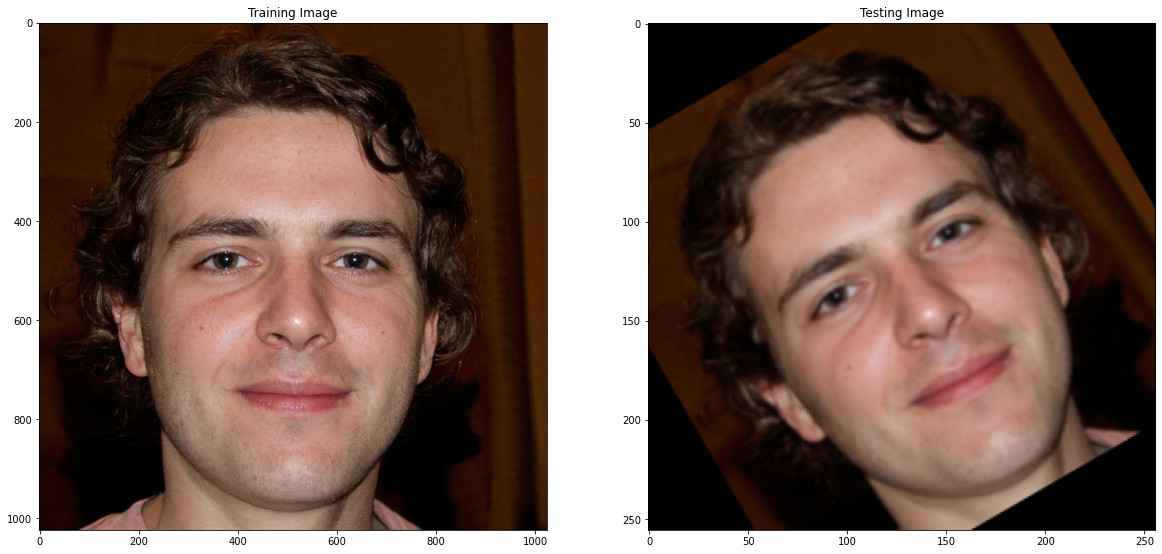

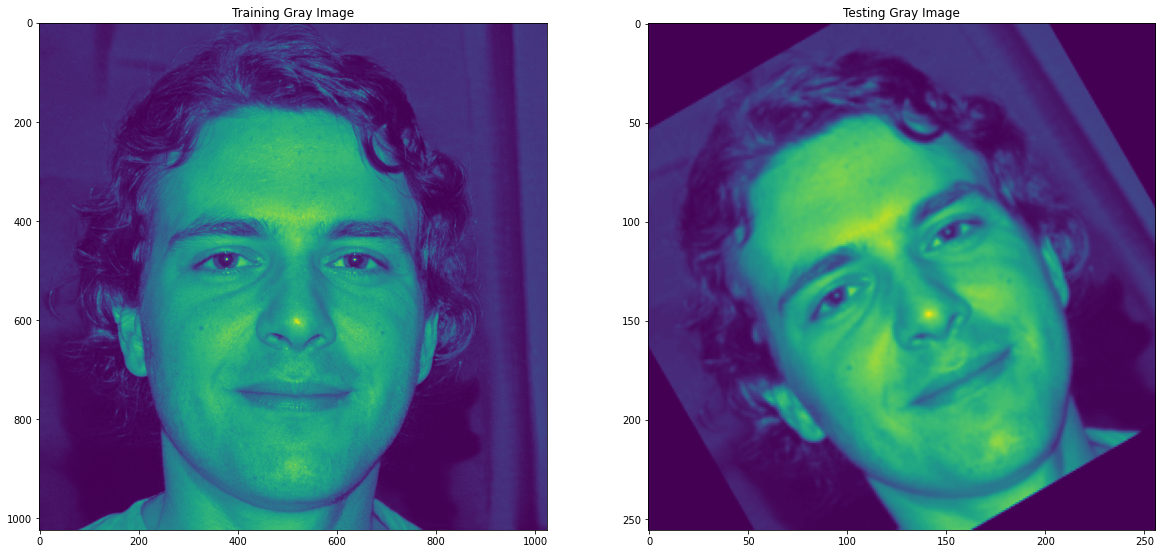

In [3]:
# Load the image
input_image = pkg_cv.imread('../data/images/gan/gan_image_1.jpg')

# Convert the training image to RGB
training_image = pkg_cv.cvtColor(input_image, pkg_cv.COLOR_BGR2RGB)
#pkg_cv.imwrite(img=training_image, filename='../.outputs/.datasets/gan_image_1_rgb.jpg')

# Convert the training image to gray scale
training_gray = pkg_cv.cvtColor(training_image, pkg_cv.COLOR_RGB2GRAY)
#pkg_cv.imwrite(img=training_gray, filename='../.outputs/.datasets/gan_image_1_gray.jpg')

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = pkg_cv.pyrDown(training_image)
test_image = pkg_cv.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = pkg_cv.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = pkg_cv.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))
#pkg_cv.imwrite(img=test_image, filename='../.outputs/.datasets/gan_image_1_test.jpg')

test_gray = pkg_cv.cvtColor(test_image, pkg_cv.COLOR_RGB2GRAY)
#pkg_cv.imwrite(img=test_gray, filename='../.outputs/.datasets/gan_image_1_test_gray.jpg')

# Display traning image and testing image
fx, plots = pkg_plot.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

# Display traning image and testing image (gray variants)
fx, plots = pkg_plot.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Gray Image")
plots[0].imshow(training_gray)

plots[1].set_title("Testing Gray Image")
plots[1].imshow(test_gray)

#### Detect Keypoints and Create Descriptor

Number of Keypoints Detected In The Training Image:  1420
Number of Keypoints Detected In The Query Image:  133


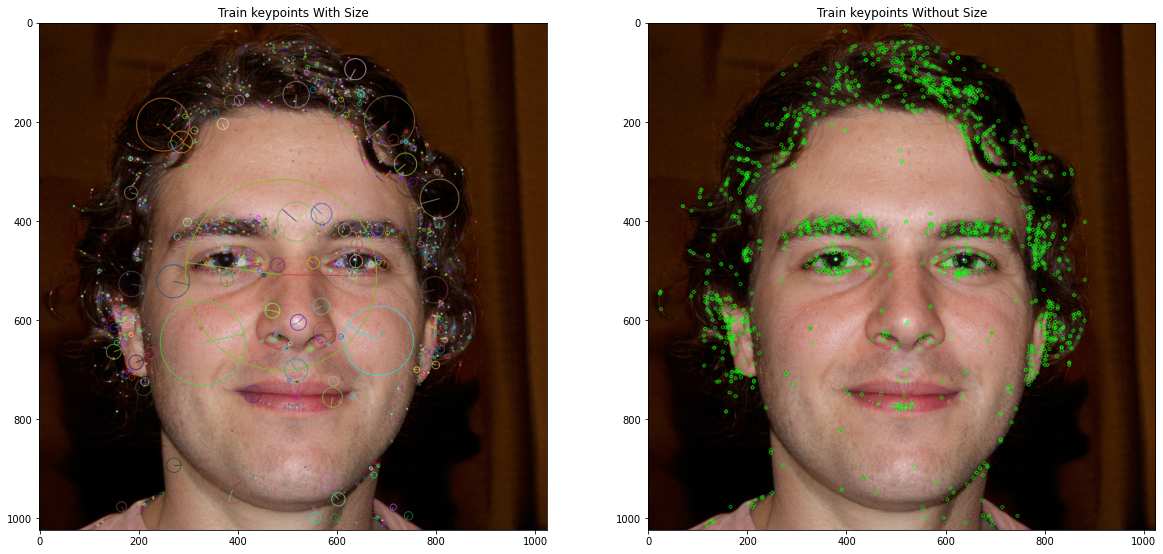

In [4]:
sift = pkg_cv.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = pkg_num.copy(training_image)
keypoints_with_size = pkg_num.copy(training_image)

pkg_cv.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0)) # Green

# Note: Play with flags
pkg_cv.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = pkg_cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = pkg_plot.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

#### Matching Keypoints

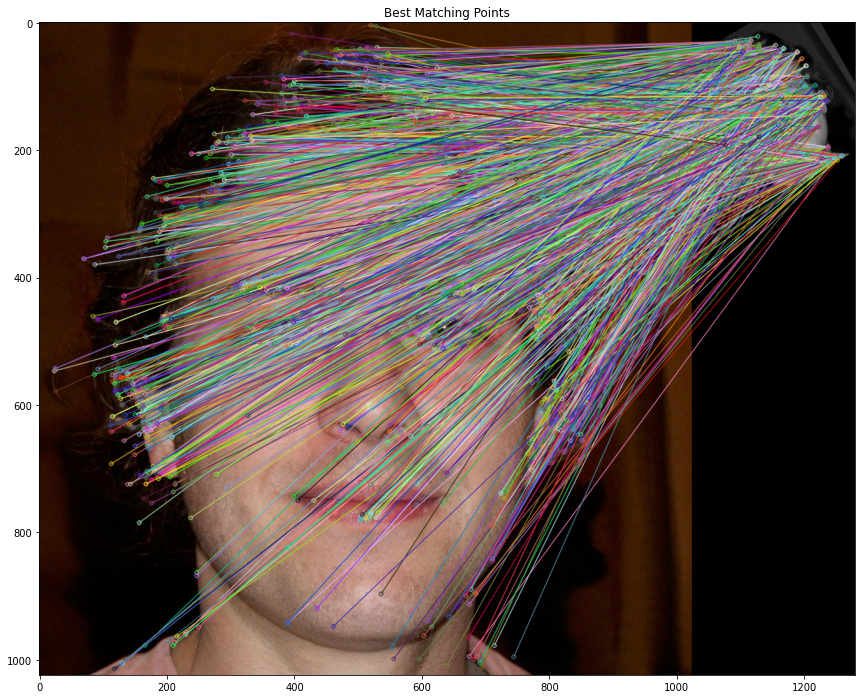


Number of Matching Keypoints Between The Training and Query Images:  1420


In [5]:
# Create a Brute Force Matcher object.
bf = pkg_cv.BFMatcher(pkg_cv.NORM_L1, crossCheck = False)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = pkg_cv.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
pkg_plot.rcParams['figure.figsize'] = [18.0, 12.0]
pkg_plot.title('Best Matching Points')
pkg_plot.imshow(result)
pkg_plot.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))